In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les données à partir du fichier texte
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]
X.shape
y.shape

(47,)

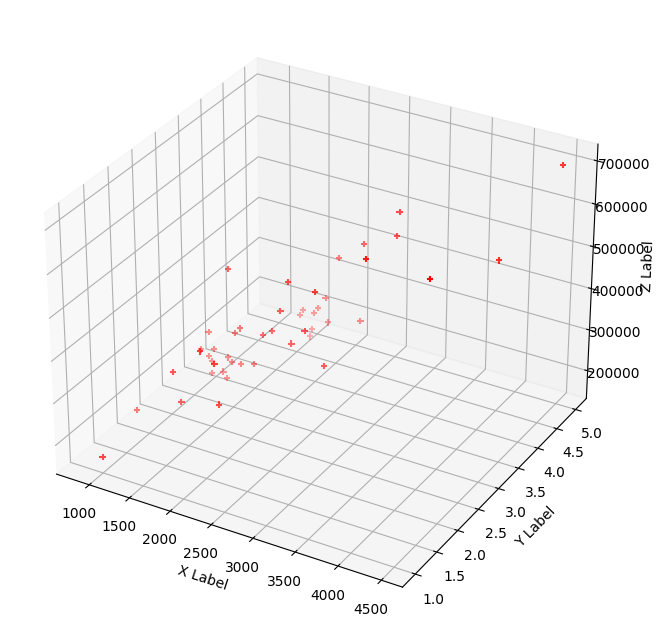

In [26]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
# Create the 3D scatter plot
ax.scatter(data[:,0], data[:,1], data[:,-1], c='r', marker='+')

# Set the labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

In [93]:
# Soustraire la valeur moyenne de chaque caractéristique
# divisez les valeurs des caractéristiques par leurs "écarts types" respectifs
def scale(x):
    x_scaled = x - np.mean(x, axis=0)
    x_scaled = x_scaled / np.std(x_scaled, axis=0)
    return x_scaled

In [98]:
def fitGradientDesc(x,y):
    alpha = 0.0000005
    # stock les erreur
    cost=[]
    theta = np.zeros((1+x.shape[1]))
    n = x.shape[0]
    for i in range(1000):
        y_pred = theta[0] + np.dot(x,theta[1:])
        
        mse = (1/(2*n))*np.sum((y_pred - y)**2)
        cost.append(mse)
        # calcule Drivee
        d_theta1 = (1/n)*np.dot(np.transpose(x),(y_pred - y))
        d_theta0 = (1/n)*np.sum((y_pred-y))
       
        # mise a jour
        theta[1:] = theta[1:] - alpha *d_theta1
        theta[0] = theta[0] - alpha *d_theta0
    # print(cost)
    return theta 
t = fitGradientDesc(X,y)
t

array([-1.84901473e+116, -4.27054438e+119, -6.16808205e+116])

In [5]:
# predire une valeur
def predictGD(theta, x):  
        return theta[0] + np.dot(x, theta[1:])

main


[170.16382783  52.86503804  27.34018741]


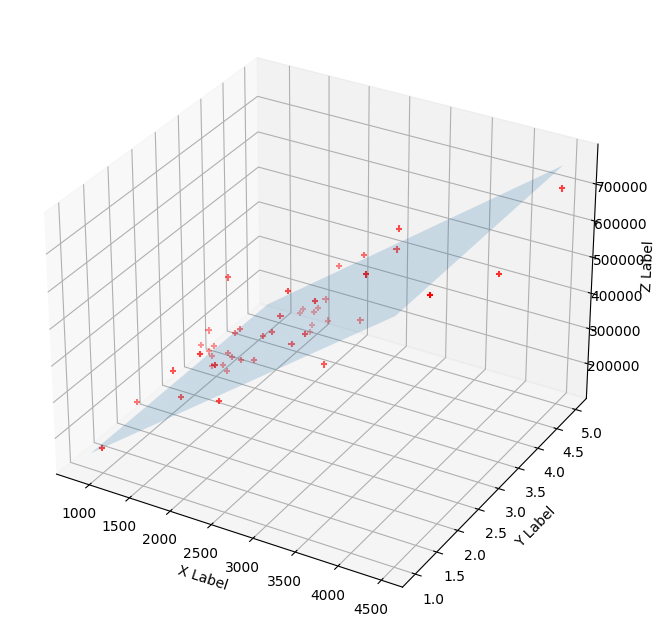

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x_sd = scale(X)

theta = fitGradientDesc(x_sd , y)
 
print(theta)
# Generate a grid of points in the X-Y plane
x = np.linspace(np.min(data[:,0]), np.max(data[:,0]))
y = np.linspace(np.min(data[:,1]), np.max(data[:,1]))
X1, Y1 = np.meshgrid(x, y)
# Calculate Z values using the equation
Z = theta[2] + theta[0]*X1 + theta[1]*Y1
# Create a 3D figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# ax.scatter(X, Y, Z, c='b', marker='+')

# ax.plot_surface(X, Y, Z, alpha=0.5)

# # Plot the scatter points
ax.scatter(data[:,0], data[:,1], data[:, -1], c='r', marker='+')
ax.plot_surface(X1, Y1, Z, alpha=0.2)

# # Set the labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# # Show the plot
plt.show()
